# Description

In this notebook you'll find a way to download the data.  
Both data with jet and without are downloaded here and are stored in the previously defined folder : data1 and data0 respectively.  
The steps are the following :  
- Importing csv file that contain the date and the cutout wanted for the image
- Making the request to the JSOC server for the wanted duration (30 images)
- Getting the numpy array from the requested files
- Transforming the array to perform a MaxPool2D (convolution over the image to deacrease its size from 500x500 to 166x166)
- Storing the image into a numpy array using a compressed version  


**Somes infos :**  
`Total number of events` = 1766  
`Downloading rate` : 2mins / event --> total = 59 hours (2,5 days !!!!)  
`File data storage` = 900 Ko  
`Total storage` = 1,6 Go   

Problem : Get stuck during the enumeration of events 

# Import functions and libraries

In [1]:
import pandas as pd
import numpy as np
from functions_AIA import *

# Run AIA requests

## First the data with jet (data1)

In [3]:
data1=load_data()
num_images=30
jsoc_email="adrien.joliat@epfl.ch"

events_list = data1.iloc[56:75]
a=0

for i in events_list.index:
    a+=1
    files = get_images(data1.iloc[i], num_images, jsoc_email) # selects data line i
    # "files" is (class <parfive>) and contains N <HDUList> objects (where N is the nb of images in the sequence) 
    # that we open as "f". The attribute f.data returns a numpy array in our case, bc the data is an image.
    # sequence_array is a 3D array of shape (166, 166, N) which contains all the pixel values for one line of data (~ 1 event)
    sequence_array = array_file(files) #torch array of the whole sequency event

    #Save the array
    np.savez_compressed("./data1/"+str(i)+".npz" , sequence_array)
    
    # Check the size of final array
    print(f"Download = {a}/{len(events_list.index)} and array ={sequence_array.shape}")

Export request pending. [id=JSOC_20231129_1015, status=2]
Waiting for 0 seconds...
30 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-04-08T175650Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T175714Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T175738Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T175802Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T175826Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T175850Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T175914Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T175938Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180002Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180026Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180050Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180114Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180138Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180202Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180226Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180250Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180314Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180338Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180402Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180426Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180450Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180514Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180538Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180602Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180626Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180650Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180714Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180738Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180802Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T180826Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

Download = 1/19 and array =(166, 166, 30)
Export request pending. [id=JSOC_20231129_1019, status=2]
Waiting for 0 seconds...
30 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-04-08T182802Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T182826Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T182850Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T182914Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T182938Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183002Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183026Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183050Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183114Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183138Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183202Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183226Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183250Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183314Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183338Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183402Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183426Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183450Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183514Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183538Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183602Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183626Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183650Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183714Z.304.image.fits:   0%|          | 0.00/204k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183738Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183802Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183826Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183850Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183914Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T183938Z.304.image.fits:   0%|          | 0.00/202k [00:00<?, ?B/s]

Download = 2/19 and array =(166, 166, 30)
Export request pending. [id=JSOC_20231129_1050, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1050, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1050, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1050, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1050, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1050, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-04-08T184338Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184402Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184426Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184450Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184514Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184538Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184602Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184626Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184650Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184714Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184738Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184802Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184826Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184850Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184914Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T184938Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T185002Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T185026Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T185050Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T185114Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T185138Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T185202Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T185226Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T185250Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T185314Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T185338Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T185402Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T185426Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T185450Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T185514Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

Download = 3/19 and array =(166, 166, 30)
Export request pending. [id=JSOC_20231129_1057, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1057, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1057, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1057, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1057, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1057, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1057, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-04-08T190426Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T190450Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T190514Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T190538Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T190602Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T190626Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T190650Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T190714Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T190738Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T190802Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T190826Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T190850Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T190914Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T190938Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191002Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191026Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191050Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191114Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191138Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191202Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191226Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191250Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191314Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191338Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191402Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191426Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191450Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191514Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191538Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-04-08T191602Z.304.image.fits:   0%|          | 0.00/207k [00:00<?, ?B/s]

Download = 4/19 and array =(166, 166, 30)
Export request pending. [id=JSOC_20231129_1063, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1063, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1063, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1063, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1063, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1063, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1063, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1063, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 5MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-27T080102Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080126Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080150Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080214Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080238Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080302Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080326Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080350Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080414Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080438Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080502Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080526Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080550Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080614Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080638Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080702Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080726Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080750Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080814Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080838Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080902Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080926Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T080950Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081014Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081038Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081102Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081126Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081150Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081214Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081238Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

Download = 5/19 and array =(166, 166, 30)
Export request pending. [id=JSOC_20231129_1067, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1067, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1067, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1067, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1067, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1067, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 5MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-27T081638Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081702Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081726Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081750Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081814Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081838Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081902Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081926Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T081950Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082014Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082038Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082102Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082126Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082150Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082214Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082238Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082302Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082326Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082350Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082414Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082438Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082502Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082526Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082550Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082614Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082638Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082702Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082726Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082750Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T082814Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

Download = 6/19 and array =(166, 166, 30)
Export request pending. [id=JSOC_20231129_1076, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1076, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1076, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1076, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1076, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1076, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1076, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 5MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-27T091402Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T091426Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T091450Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T091514Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T091538Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T091602Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T091626Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T091650Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T091714Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T091738Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T091802Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T091826Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T091850Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T091914Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T091938Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092002Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092026Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092050Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092114Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092138Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092202Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092226Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092250Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092314Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092338Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092402Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092426Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092450Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092514Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T092538Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

Download = 7/19 and array =(166, 166, 30)
Export request pending. [id=JSOC_20231129_1080, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1080, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1080, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1080, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1080, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1080, status=1]
Waiting for 5 seconds...
6 URLs found for download. Full request totalling 1MB


Files Downloaded:   0%|          | 0/6 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-27T221026Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T221226Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T221426Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T221626Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T221826Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T222026Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

Download = 8/19 and array =(166, 166, 6)
Export request pending. [id=JSOC_20231129_1083, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1083, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1083, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1083, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1083, status=1]
Waiting for 5 seconds...
5 URLs found for download. Full request totalling 1MB


Files Downloaded:   0%|          | 0/5 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-27T222326Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T222526Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T222926Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T223126Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T223326Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

Download = 9/19 and array =(166, 166, 5)
Export request pending. [id=JSOC_20231129_1083, status=2]
Waiting for 0 seconds...
5 URLs found for download. Full request totalling 1MB


Files Downloaded:   0%|          | 0/5 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-27T222326Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T222526Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T222926Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T223126Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T223326Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

Download = 10/19 and array =(166, 166, 5)
Export request pending. [id=JSOC_20231129_1086, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1086, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1086, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1086, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1086, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1086, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1086, status=1]
Waiting for 5 seconds...
25 URLs found for download. Full request totalling 5MB


Files Downloaded:   0%|          | 0/25 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-27T223826Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224026Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224114Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224138Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224202Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224226Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224250Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224314Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224338Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224402Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224426Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224450Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224514Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224538Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224602Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224626Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224650Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224714Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224738Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224802Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224826Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224850Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224914Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T224938Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T225002Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

Download = 11/19 and array =(166, 166, 25)
Export request pending. [id=JSOC_20231129_1094, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1094, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1094, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1094, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1094, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1094, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-27T231626Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T231650Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T231714Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T231738Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T231802Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T231826Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T231850Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T231914Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T231938Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232002Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232026Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232050Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232114Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232138Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232202Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232226Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232250Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232314Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232338Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232402Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232426Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232450Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232514Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232538Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232602Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232626Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232650Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232714Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232738Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-27T232802Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

Download = 12/19 and array =(166, 166, 30)
Export request pending. [id=JSOC_20231129_1099, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1099, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1099, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1099, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1099, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1099, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1099, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-28T000002Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000026Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000050Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000114Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000138Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000202Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000226Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000250Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000314Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000338Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000402Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000426Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000450Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000514Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000538Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000602Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000626Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000650Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000714Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000738Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000802Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000826Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000850Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000914Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T000938Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T001002Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T001026Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T001050Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T001114Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T001138Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

Download = 13/19 and array =(166, 166, 30)
Export request pending. [id=JSOC_20231129_1103, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1103, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1103, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1103, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1103, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1103, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1103, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-28T031226Z.304.image.fits:   0%|          | 0.00/199k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031250Z.304.image.fits:   0%|          | 0.00/199k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031314Z.304.image.fits:   0%|          | 0.00/199k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031338Z.304.image.fits:   0%|          | 0.00/199k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031402Z.304.image.fits:   0%|          | 0.00/199k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031426Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031450Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031514Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031538Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031602Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031626Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031650Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031714Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031738Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031802Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031826Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031850Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031914Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T031938Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T032002Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T032026Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T032050Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T032114Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T032138Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T032202Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T032226Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T032250Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T032314Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T032338Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T032402Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

Download = 14/19 and array =(166, 166, 30)
Export request pending. [id=JSOC_20231129_1108, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1108, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1108, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1108, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1108, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1108, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1108, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-28T033826Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T033850Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T033914Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T033938Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034002Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034026Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034050Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034114Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034138Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034202Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034226Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034250Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034314Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034338Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034402Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034426Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034450Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034514Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034538Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034602Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034626Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034650Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034714Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034738Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034802Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034826Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034850Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034914Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T034938Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035002Z.304.image.fits:   0%|          | 0.00/210k [00:00<?, ?B/s]

Download = 15/19 and array =(166, 166, 30)
Export request pending. [id=JSOC_20231129_1111, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1111, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1111, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1111, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1111, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1111, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1111, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-28T035402Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035426Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035450Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035514Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035538Z.304.image.fits:   0%|          | 0.00/193k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035602Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035626Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035650Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035714Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035738Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035802Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035826Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035850Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035914Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T035938Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040002Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040026Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040050Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040114Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040138Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040202Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040226Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040250Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040314Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040338Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040402Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040426Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040450Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040514Z.304.image.fits:   0%|          | 0.00/196k [00:02<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T040538Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

Download = 16/19 and array =(166, 166, 30)
Export request pending. [id=JSOC_20231129_1114, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1114, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1114, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1114, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1114, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1114, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-28T044050Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044114Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044138Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044202Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044226Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044250Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044314Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044338Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044402Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044426Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044450Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044514Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044538Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044602Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044626Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044650Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044714Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044738Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044802Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044826Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044850Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044914Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T044938Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T045002Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T045026Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T045050Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T045114Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T045138Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T045202Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T045226Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

Download = 17/19 and array =(166, 166, 30)
Export request pending. [id=JSOC_20231129_1118, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1118, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1118, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1118, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1118, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1118, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1118, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-28T054326Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054350Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054414Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054438Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054502Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054526Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054550Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054614Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054638Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054702Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054726Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054750Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054814Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054838Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054902Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054926Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T054950Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T055014Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T055038Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T055102Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T055126Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T055150Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T055214Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T055238Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T055302Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T055326Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T055350Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T055414Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T055438Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T055502Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

Download = 18/19 and array =(166, 166, 30)
Export request pending. [id=JSOC_20231129_1121, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231129_1121, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1121, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1121, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1121, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1121, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231129_1121, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-05-28T062502Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T062526Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T062550Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T062614Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T062638Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T062702Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T062726Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T062750Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T062814Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T062838Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T062902Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T062926Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T062950Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063014Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063038Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063102Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063126Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063150Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063214Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063238Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063302Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063326Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063350Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063414Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063438Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063502Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063526Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063550Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063614Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-05-28T063638Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

Download = 19/19 and array =(166, 166, 30)


## Secondly, data without jet (data0)

In [2]:
data0=load_data_nojet()
num_images=30
jsoc_email="adrien.joliat@epfl.ch"

events_list = data0.iloc[:1]
a=0
for i in events_list.index:
    a+=1
    files = get_images(data0.iloc[i], num_images, jsoc_email) # selects data line i
    # "files" is (class <parfive>) and contains N <HDUList> objects (where N is the nb of images in the sequence) 
    # that we open as "f". The attribute f.data returns a numpy array in our case, bc the data is an image.
    # sequence_array is a array of shape (166, 166, N) which contains all the pixel values for one line of data (~ 1 event)
    sequence_array = array_file(files) #torch array of the whole sequency event

    #Save the array
    np.savez_compressed("./data0/"+str(i)+".npz" , sequence_array)
    
    # Check the size of final array
    print(f"Download = {a}/{len(events_list.index)} and array ={sequence_array.shape}")

Export request pending. [id=JSOC_20231128_1769, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231128_1769, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231128_1769, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231128_1769, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231128_1769, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231128_1769, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 5MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-07-08T160002Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160026Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160050Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160114Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160138Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160202Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160226Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160250Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160314Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160338Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160402Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160426Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160450Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160514Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160538Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160602Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160626Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160650Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160714Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160738Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160802Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160826Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160850Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160914Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160938Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T161002Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T161026Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T161050Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T161114Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T161138Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

Download = 1/1 and array =(166, 166, 30)


## Access data 

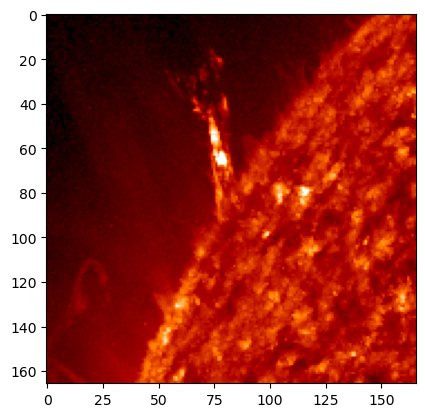

In [9]:
archive= np.load("./data1/20.npz")
array=archive["arr_0"]
plot_array(array[:,:,20])

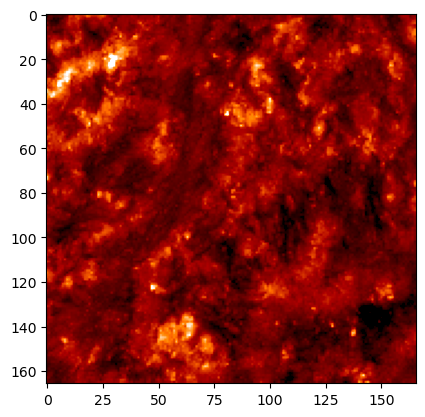

In [6]:
archive= np.load("./data0/0.npz")
array=archive["arr_0"]
plot_array(array[:,:,15])